In [1]:
import numpy as np
import matplotlib.pyplot as plt

## PCA

In [2]:
dataset = np.loadtxt('seeds_dataset.txt')
X = dataset[:,:-1]
y = dataset[:,-1]
mu = np.mean(X, axis=0)
sigma = np.cov(X.T)

u, s, v = np.linalg.svd(sigma)
U = u[:,:2]
z = U.T @ (X-mu).T
z #new representation

array([[-0.66344838, -0.31566651,  0.6604993 ,  1.0552759 , -1.61999921,
         0.47693801,  0.18483472,  0.78062962, -2.2821081 , -1.97854147,
        -0.36912295,  0.7110212 ,  1.21370535,  1.16908541,  1.19272176,
         0.50817121,  1.37469698, -1.05726438,  0.1509611 ,  2.46241293,
         0.6313321 ,  0.68969866, -1.40769072,  2.84267672, -0.43326822,
        -1.81289158,  2.02131332,  2.19571862,  0.74446884,  1.5035048 ,
         1.5207532 , -0.76119026,  0.76773843,  0.82396593, -0.4395424 ,
        -1.52205298, -1.65240525, -2.47674445, -0.01157507,  1.11443822,
         1.3716017 ,  1.36349513,  1.88302954, -0.62956057, -0.28441212,
         0.96004475, -0.81896462, -0.1966213 , -0.01532761, -0.25423517,
         0.50538453, -0.71197309,  0.35582938,  0.56685633, -0.01809689,
        -0.47842486,  0.37546464, -0.28388332, -0.76942973,  2.77110124,
         3.8034482 ,  4.00534905,  2.87823982,  1.87406423,  2.0508933 ,
         2.16820614,  0.2596738 ,  0.70708443,  0.2

## K-means

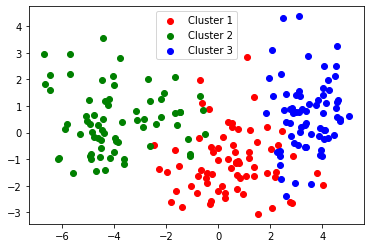

In [3]:
# ground true
colors = ['r', 'g', 'b']
for i in range(1, 4):
    plt.scatter(z[0,y==i], z[1,y==i], c=colors[i-1], label=f'Cluster {i}')
plt.legend()
plt.show()

In [4]:
def assignment(X,c):
    d1 = np.linalg.norm(X - c[0], axis=1)
    d2 = np.linalg.norm(X - c[1], axis=1)
    d3 = np.linalg.norm(X - c[2], axis=1)
    D = np.stack((d1, d2, d3), axis=1)
    labels = np.argmin(D, axis=1) #assign the label with min distance
    return labels

def refitting(X,labels):
    c1 = np.mean(X[labels==0], axis=0)
    c2 = np.mean(X[labels==1], axis=0)
    c3 = np.mean(X[labels==2], axis=0)
    return (c1,c2,c3)

np.random.seed(0)
initialCenter = np.random.choice(dataset.shape[0], size=3, replace=False)
x = z.T

center = (x[initialCenter[0]],x[initialCenter[1]],x[initialCenter[2]])
labelList = assignment(x,center)
while True:
    center = refitting(x,labelList)
    if all(assignment(x,center)==labelList):
        break # converge
    labelList = assignment(x,center)
print("centers: ")
print(center)
print("labels of all corresponding data points: ")
print(labelList)

centers: 
(array([3.32787801, 0.64576148]), array([-4.33639856,  0.46609094]), array([ 0.11491258, -1.08548863]))
labels of all corresponding data points: 
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]


## Silhouette Coefficient

In [5]:
distances = np.sqrt(((x[:, np.newaxis, :] - x) ** 2).sum(axis=2))
a = np.zeros(x.shape[0]) # the mean distance between one data and all other points in the same cluster
b = np.full(x.shape[0], np.inf) # the mean distance between one data and all other points in the next nearest cluster

for i in np.unique(labelList):
    same_cluster = np.where(labelList == i)[0]
    a[same_cluster] = distances[same_cluster][:,same_cluster].sum(axis=1)/(same_cluster.size-1)

    for j in np.unique(labelList):
        if j != i:
            other_clusters = np.where(labelList == j)[0]
            other_cluster_mean_distances = distances[same_cluster][:,other_clusters].mean(axis=1)
            b[same_cluster] = np.minimum(b[same_cluster], other_cluster_mean_distances)

print("silhouette coefficient:",((b-a)/np.maximum(a,b)).mean())

silhouette coefficient: 0.4802142699427175


## Rand Index

In [6]:
a = 0 #the number of pairs in the same cluster
b = 0 # the number of pairs in the different clusters
for i in range(y.shape[0]):
    for j in range(i+1, y.shape[0]):
        if y[i]==y[j] and labelList[i]==labelList[j]:
            a += 1
        elif y[i]!=y[j] and labelList[i]!=labelList[j]:
            b += 1

print("rand index:",2*(a+b)/(x.shape[0]*(x.shape[0]-1)))

rand index: 0.8743677375256322
